## PY 599 Applied AI class: Homework
**Due Date: Tuesday Nov 13, 3PM**

There have been couple of important concepts and topics that in the class we couldn't go through in adequate details because of lack of enough time, so in this homework we review them and put them to use. Please ask questions about these topics during the class, or come and meet me during office hours.

## Multilayer neural network for Regression Problems 


In machine learning we can group the problems we like to solve into two groups based on the nature of the outputs: Regression Problems, where we like to predict a continuous-valued output, and classification problems where we like to determine to which category a given input belongs.

In the class we used multilayer, feedforforward neural networks to solve multiple classification problems. But we never solved a regression problem with it. We used linear regression models for regression problem (house values), but not the multilayer neural network. Let’s do this in this homework. 


We have said this many times in the class and let’s say it one more time here again: In machine learning, training a model is different from traditional optimization. In machine learning our final goal is to train a model that performs well over unseen, new data, but we reduce and optimize the model over training data with this hope that doing so will improve the performance of the model over the test data as well. One can call this some form of indirect optimization (optimizing the model over one set of data hoping that performance measures improve over another set of (unseen) data), whereas in pure optimization, minimizing the cost function itself is a goal in and of itself. 

After indicating this fundamental difference between machine learning and pure optimization, let’s put our focus on optimization techniques that we use for machine learning to minimize the error over the training data.



In [16]:
from keras.datasets import boston_housing
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
seed = 42
np.random.seed(seed)

# you are going to define a feedforward network pretty in the same way you defined for classification problems - except no output 
# function (no activation function on the output layer) and you you need to have the proper cost function for regression. Can
# you remember what it was?

# Scaling
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# create model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
  
# Compile model
# Two different model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size = 10, verbose=2)
score = model.evaluate(x_test, y_test)
print ("Mean Squared Error: %0.2f", score)
# K fold validation, print out accuracy: doesn't work

#estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=5, verbose=0)
#kfold = KFold(n_splits=4, random_state=seed)

# Found this on scikit 
#scores = cross_val_score(estimator, x_train, y_train, cv=kfold)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Epoch 1/100
 - 0s - loss: 588.2586
Epoch 2/100
 - 0s - loss: 564.6263
Epoch 3/100
 - 0s - loss: 534.9257
Epoch 4/100
 - 0s - loss: 489.9904
Epoch 5/100
 - 0s - loss: 424.2832
Epoch 6/100
 - 0s - loss: 342.7908
Epoch 7/100
 - 0s - loss: 258.1468
Epoch 8/100
 - 0s - loss: 186.0823
Epoch 9/100
 - 0s - loss: 133.1589
Epoch 10/100
 - 0s - loss: 101.1245
Epoch 11/100
 - 0s - loss: 81.0786
Epoch 12/100
 - 0s - loss: 67.1148
Epoch 13/100
 - 0s - loss: 56.7781
Epoch 14/100
 - 0s - loss: 48.7884
Epoch 15/100
 - 0s - loss: 43.0650
Epoch 16/100
 - 0s - loss: 38.5725
Epoch 17/100
 - 0s - loss: 35.4425
Epoch 18/100
 - 0s - loss: 33.1871
Epoch 19/100
 - 0s - loss: 31.4202
Epoch 20/100
 - 0s - loss: 30.1923
Epoch 21/100
 - 0s - loss: 29.1407
Epoch 22/100
 - 0s - loss: 28.2923
Epoch 23/100
 - 0s - loss: 27.5122
Epoch 24/100
 - 0s - loss: 26.9357
Epoch 25/100
 - 0s - loss: 26.3039
Epoch 26/100
 - 0s - loss: 25.7821
Epoch 27/100
 - 0s - loss: 25.3783
Epoch 28/100
 - 0s - loss: 24.8222
Epoch 29/100
 - 0s 

### Momentum

The method of momentum is a very popular and powerful optimization technique used in learning.  Momentum stands on the shoulders of the very capable gradient descent method, and on top of it, it improves multiple shortcomings of gradient descent. The method of momemntum is introduced to accelerate learning,  especially in the face of high curviture, small but consistent gradients, or noisy gradients.

The name momentum is derived from a physical analogy; consider the negative gradient of the cost function as the force. And consider the set of parameter values that we calculate during the training as a particle that is moving over the surface of the cost function according to this force.  In regular gradient descent the particle follows this gradient to find the minimum point. But there are problems. What if the cost function contours are not symmetrically scaled and they are narrower in some direction than others (poor conditioned)? 

![alt text](http://appliedai.wordpress.ncsu.edu/files/2018/11/Screen-Shot-2018-11-04-at-10.27.20-PM.png)

In such situation the optimization path (the path particle follows) oscillates wildly and it can take a long time to reach to a good minimum point. 
What if the gradient is very small in some surface areas of the cost function (plateau) or there is a local minimum? 

Momentum method helps us to overcome these challenges. In momentum method, in addition to the force (the negative gradient of the cost function), we assume the particle has a momentum as well, which is built over time based on the force (negative gradients). Consider momentum as the exponentially decaying moving average of past gradients. So momentum damps down the oscillations, and it allows the particle to pass through the plateaus and shallow local minimums. 

For more information on momentum, please read Goodfelow’s Deep Learning Book pages 288-291, and watch Andrew Ng’s 9-minute lecture on this concept. 
https://www.youtube.com/watch?v=k8fTYJPd3_I
Let’s add momentum to our gradient descent method we studied in the class. You might remember that the regular gradient descent was unable to get out of a local minimum. The momentum method helps us to get out of this local minimum point (but some parameters need to be tuned properly). Add the momentum to this example, run it, and see how momentum allow you to get of this local minimum point. Programing the momentum method and adding it to regular gradient descent is very easy. It requires defining a new momentum term (initialize it to zero at the beginning), and use a new additional hyperparameter to adjust the momentum term during each update. 







0.0081044726824262


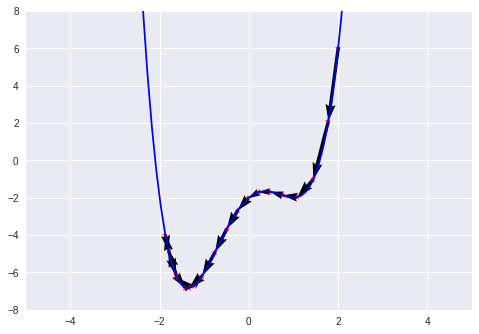

In [11]:
# This is SGD without momentum. Add momentum to this code and compare the performance
import matplotlib.pyplot as plt
import numpy as np

#this is where we define the function f. this function returns back f(x)
def non_convex_f(z):
  return (z**4-3*z**2+2*z-2)

#this function returns back the derivative of the defined the function f at different values x, i.e. it returns back df/d(x) evaluated at x.

def d_non_convex_f(z):
  return(4*z**3-6*z+2)

epsilon = 0.01  #step size (learning rate in context of machine learning)
n_iterations = 20
momentum = 0
alpha = 0.9

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=1)
x = 2     #initial condition
trajectory=np.array([x])


plt.plot(x,non_convex_f(x),'k.')

precision=0.001
# step_size=1
iteration=0

print(step_size)

while (step_size > precision) & (iteration < n_iterations):
    momentum = alpha * momentum - epsilon * d_non_convex_f(x)
    x = x + momentum
    plt.plot(x,d_non_convex_f(x))
    iteration=iteration+1
    trajectory=np.append(trajectory,x)

    

plt.plot(trajectory,non_convex_f(trajectory),'r*')
plt.quiver(trajectory[:-1], non_convex_f(trajectory)[:-1], trajectory[1:]-trajectory[:-1], non_convex_f(trajectory)[1:]-non_convex_f(trajectory)[:-1], scale_units='xy', angles='xy', scale=1)
plt.axis([-5, 5, -8, 8])
xx=np.linspace(-5,5,100)
yy=non_convex_f(xx)
plt.plot(xx,yy,'b')
plt.show()

In popular deep learning frameworks and libraries, you don't have to do any programing in order to implement momentum. Many of those built-in optimizers come with momentum, you just have to enable and set the hyperparameters of the momentum (if it is not done by default). For example, see "momentum" parameter for SGD technique in Keras:
https://keras.io/optimizers/#sgd

## Nesterov Momentum

Momentum tells us to which direction the particle is heading. In regular momentum method, we evaluate the gradient at the current location and updatet he momentum, and then step forward according to the momentum. But Nesterov tells us that why not evaluate the gradient ahead according to momentum (instead of evaluating at the current location), update the momentum with this looking ahead gradient, and then step forward. This gradual, but consistent improvement over the trajectory improves the performance. Please read Nesterov momentum from Goodfellow's deep learning book, pages 291-292, update your momentum code and include Nestrerov update, and execute it again.

0.0081044726824262


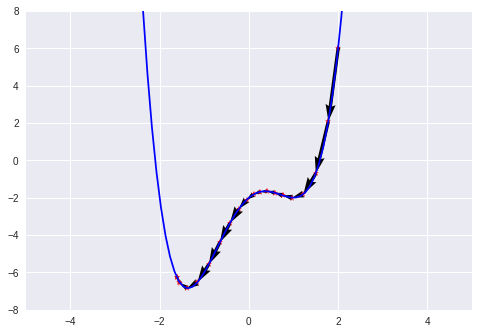

In [15]:
# This is SGD without momentum. Add momentum to this code and compare the performance
import matplotlib.pyplot as plt
import numpy as np

#this is where we define the function f. this function returns back f(x)
def non_convex_f(z):
  return (z**4-3*z**2+2*z-2)

#this function returns back the derivative of the defined the function f at different values x, i.e. it returns back df/d(x) evaluated at x.

def d_non_convex_f(z):
  return(4*z**3-6*z+2)

epsilon = 0.01  #step size (learning rate in context of machine learning)
n_iterations = 20
momentum = 0
alpha = 0.9

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=1)
x = 2     #initial condition
trajectory=np.array([x])


plt.plot(x,non_convex_f(x),'k.')

precision=0.001
# step_size=1
iteration=0

print(step_size)

while (step_size > precision) & (iteration < n_iterations):
    momentum = alpha * momentum - epsilon * d_non_convex_f(x + alpha * momentum)
    x = x + momentum
    plt.plot(x,d_non_convex_f(x))
    iteration=iteration+1
    trajectory=np.append(trajectory,x)

    

plt.plot(trajectory,non_convex_f(trajectory),'r*')
plt.quiver(trajectory[:-1], non_convex_f(trajectory)[:-1], trajectory[1:]-trajectory[:-1], non_convex_f(trajectory)[1:]-non_convex_f(trajectory)[:-1], scale_units='xy', angles='xy', scale=1)
plt.axis([-5, 5, -8, 8])
xx=np.linspace(-5,5,100)
yy=non_convex_f(xx)
plt.plot(xx,yy,'b')
plt.show()
# add Nesterov Momentum to previous code

Similiar to regular momentum method, in popular deep learning frameworks and libraries, you don't have to do any programing in order to implement Nesterov momentum. Many of those built-in optimizers come with Nesterov momentum, you just have to enable it. For example, see "nesterov" parameter for SGD technique in Keras: https://keras.io/optimizers/#sgd

## SGD vs. Adam Vs. RMSprop 

Try Adam and RMSprop for optimizing your model, and compare their speed against the regulat SGD.

In [29]:
from time import time

optimizers = ['sgd','RMSprop','adam']

for i in range(len(optimizers)):
  model = Sequential()
  model.add(Dense(13, input_dim=13, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer= optimizers[i])
  start = time()
  model.fit(x_train, y_train, epochs=100, batch_size = 10, verbose=0)
  print ("Time taken for %s: %0.2f" %(optimizers[i], (time() - start)))
  score = model.evaluate(x_test, y_test)
  print ("Mean Squared Error for %s: %0.2f" %(optimizers[i], score))

Time taken for sgd: 14.11
102/102 [==============================] - 0s 3ms/step
Mean Squared Error for sgd: 33.90
Time taken for RMSprop: 16.73
102/102 [==============================] - 0s 3ms/step
Mean Squared Error for RMSprop: 20.89
Time taken for adam: 19.62
102/102 [==============================] - 0s 4ms/step
Mean Squared Error for adam: 21.31
